In [1]:
# preprocess the train df

import csv
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
pd.options.mode.chained_assignment = None

df = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")

#If VIP is NA then make it false
df['VIP'] = df['VIP'].fillna(False).infer_objects() 


df[['Deck', 'Roomnumber', 'Shipside']] = df['Cabin'].str.split('/', expand=True) #split the cabin column appropriately
df = df.drop('Cabin', axis = 1)


# Replace NaN values in the 'Age' column with the mean value
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['RoomService'].fillna(df['RoomService'].mean(), inplace=True)
df['FoodCourt'].fillna(df['FoodCourt'].mean(), inplace=True)
df['ShoppingMall'].fillna(df['ShoppingMall'].mean(), inplace=True)
df['Spa'].fillna(df['Spa'].mean(), inplace=True)
df['VRDeck'].fillna(df['VRDeck'].mean(), inplace=True)

# Create one hot encoding columns
df_Train = pd.get_dummies(df,columns=["HomePlanet","Deck","Shipside","Destination"], dummy_na=True)

x_df = pd.DataFrame()
column_values = []
# create an x np array with all variables made as numerical
for column in df_Train.columns:
    if column not in ["PassengerId","Name","Transported","Roomnumber"]:
        # Append values of each column to the list
        column_values.append(df_Train[column].values.reshape(-1, 1))
        x_df[column] = df_Train[column].astype(float)  # Convert to numerical if needed
# x_df["HomePlanet"] = df_Train["HomePlanet"]
x = np.concatenate(column_values, axis=1)
# Scale all the values in x
scaler = StandardScaler()
x_svm = scaler.fit_transform(x)

y_1 = df["Transported"].astype(int).values.reshape(-1, 1)
y_1 = y_1.ravel()


/tmp/ipykernel_18/1410596282.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['VIP'] = df['VIP'].fillna(False).infer_objects()
/tmp/ipykernel_18/1410596282.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/tmp/ipykernel_18/1410596282.py:21: FutureWarni

In [2]:
# Predict which variables should be used to replace NA for the Destination Column as this is the most important predictor column value

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

# Assuming x_df is your DataFrame

# Separate rows with known and unknown destinations
known_cryo = x_df[x_df['CryoSleep'].notna()]
unknown_cryo = x_df[x_df['CryoSleep'].isna()]

# Encode categorical variables
encoder = LabelEncoder()
known_cryo['CryoSleep'] = encoder.fit_transform(known_cryo['CryoSleep'])

# Prepare feature matrix X and target vector y
features = ['VRDeck', 'Age', 'VIP', 'RoomService', 'FoodCourt','ShoppingMall',
            'Spa','Destination_55 Cancri e','HomePlanet_Earth','HomePlanet_Europa','HomePlanet_Mars',
            'Destination_PSO J318.5-22','Destination_TRAPPIST-1e', 'Destination_nan',
            'Deck_A','Deck_B','Deck_C','Deck_E','Deck_F','Deck_G','Deck_T', 'Deck_nan',
            'Shipside_P','Shipside_S', 'Shipside_nan']
X = known_cryo[features]
y = known_cryo['CryoSleep']

# Initialize the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# Perform k-fold cross-validation and calculate the accuracy
k = 5  # Number of folds
scores = cross_val_score(clf, X, y, cv=k, scoring='accuracy')

# Print the cross-validation scores and the mean accuracy
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean()}")

# Train the model on the entire known dataset
clf.fit(X, y)

# Process unknown homeplanets
X_unknown = unknown_cryo[features]

# Predict the missing destinations
predicted_home = clf.predict(X_unknown)

# Inverse transform the predictions to original labels
predicted_home_labels = encoder.inverse_transform(predicted_home)

# Fill the missing values in the original DataFrame
x_df.loc[x_df['CryoSleep'].isna(), 'CryoSleep'] = predicted_home_labels

Cross-validation scores: [0.93867925 0.94336283 0.94572271 0.94749263 0.94572271]
Mean accuracy: 0.9441960260477542


In [3]:
# preprocess the test df

import csv
import pandas as pd
import numpy as np

df_test = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")
# print(df_test)

#    Improve the data
df_test['VIP'] = df_test['VIP'].fillna(False).infer_objects() #If VIP is NA then make it false
df_test[['Deck', 'Roomnumber', 'Shipside']] = df_test['Cabin'].str.split('/', expand=True) #split the cabin column appropriately
df_test = df_test.drop('Cabin', axis = 1)

# Replace NaN values in the 'Age' column with the mean value
df_test['Age'].fillna(df_test['Age'].mean(), inplace=True)
df_test['RoomService'].fillna(df_test['RoomService'].mean(), inplace=True)
df_test['FoodCourt'].fillna(df_test['FoodCourt'].mean(), inplace=True)
df_test['ShoppingMall'].fillna(df_test['ShoppingMall'].mean(), inplace=True)
df_test['Spa'].fillna(df_test['Spa'].mean(), inplace=True)
df_test['VRDeck'].fillna(df_test['VRDeck'].mean(), inplace=True)

df_test2 = pd.get_dummies(df_test,columns=["HomePlanet","Destination","Deck","Shipside"], dummy_na=True)

x_test_df = pd.DataFrame()
column_values = []
# create an x np array with all variables made as numerical
for column in df_test2.columns:
    if column not in ["PassengerId","Name","Transported","Roomnumber"]:
        # Append values of each column to the list
        column_values.append(df_test2[column].values.reshape(-1, 1))
        x_test_df[column] = df_test2[column].astype(float)  # Convert to numerical if needed
x_test_df["PassengerId"] = df_test["PassengerId"]

# Separate rows with known and unknown destinations
known_cryo1 = x_test_df[x_test_df['CryoSleep'].notna()]
unknown_cryo1 = x_test_df[x_test_df['CryoSleep'].isna()]

# Encode categorical variables
encoder1 = LabelEncoder()
known_cryo1['CryoSleep'] = encoder1.fit_transform(known_cryo1['CryoSleep'])

# Prepare feature matrix X and target vector y
features1 = ['VRDeck', 'Age', 'VIP', 'RoomService', 'FoodCourt','ShoppingMall',
            'Spa','Destination_55 Cancri e','HomePlanet_Earth','HomePlanet_Europa','HomePlanet_Mars',
            'Destination_PSO J318.5-22','Destination_TRAPPIST-1e', 'Destination_nan',
            'Deck_A','Deck_B','Deck_C','Deck_E','Deck_F','Deck_G','Deck_T', 'Deck_nan',
            'Shipside_P','Shipside_S', 'Shipside_nan']
X1 = known_cryo1[features1]
y1 = known_cryo1['CryoSleep']


# Process unknown homeplanets
X_unknown1 = unknown_cryo1[features1]

# Predict the missing destinations
predicted_cryo1 = clf.predict(X_unknown1)

# Inverse transform the predictions to original labels
predicted_cryo_labels1 = encoder1.inverse_transform(predicted_cryo1)

# Fill the missing values in the original DataFrame
x_test_df.loc[x_test_df['CryoSleep'].isna(), 'CryoSleep'] = predicted_cryo_labels1

print(x_test_df.columns.tolist())

print('succes!')

['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'HomePlanet_nan', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Destination_nan', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T', 'Deck_nan', 'Shipside_P', 'Shipside_S', 'Shipside_nan', 'PassengerId']
succes!


/tmp/ipykernel_18/180522402.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test['VIP'] = df_test['VIP'].fillna(False).infer_objects() #If VIP is NA then make it false
/tmp/ipykernel_18/180522402.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Age'].fillna(df_test['Age'].mean(), inplace=Tr

['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'HomePlanet_nan', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T', 'Deck_nan', 'Shipside_P', 'Shipside_S', 'Shipside_nan', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Destination_nan']
Accuracy: 0.8033352501437608


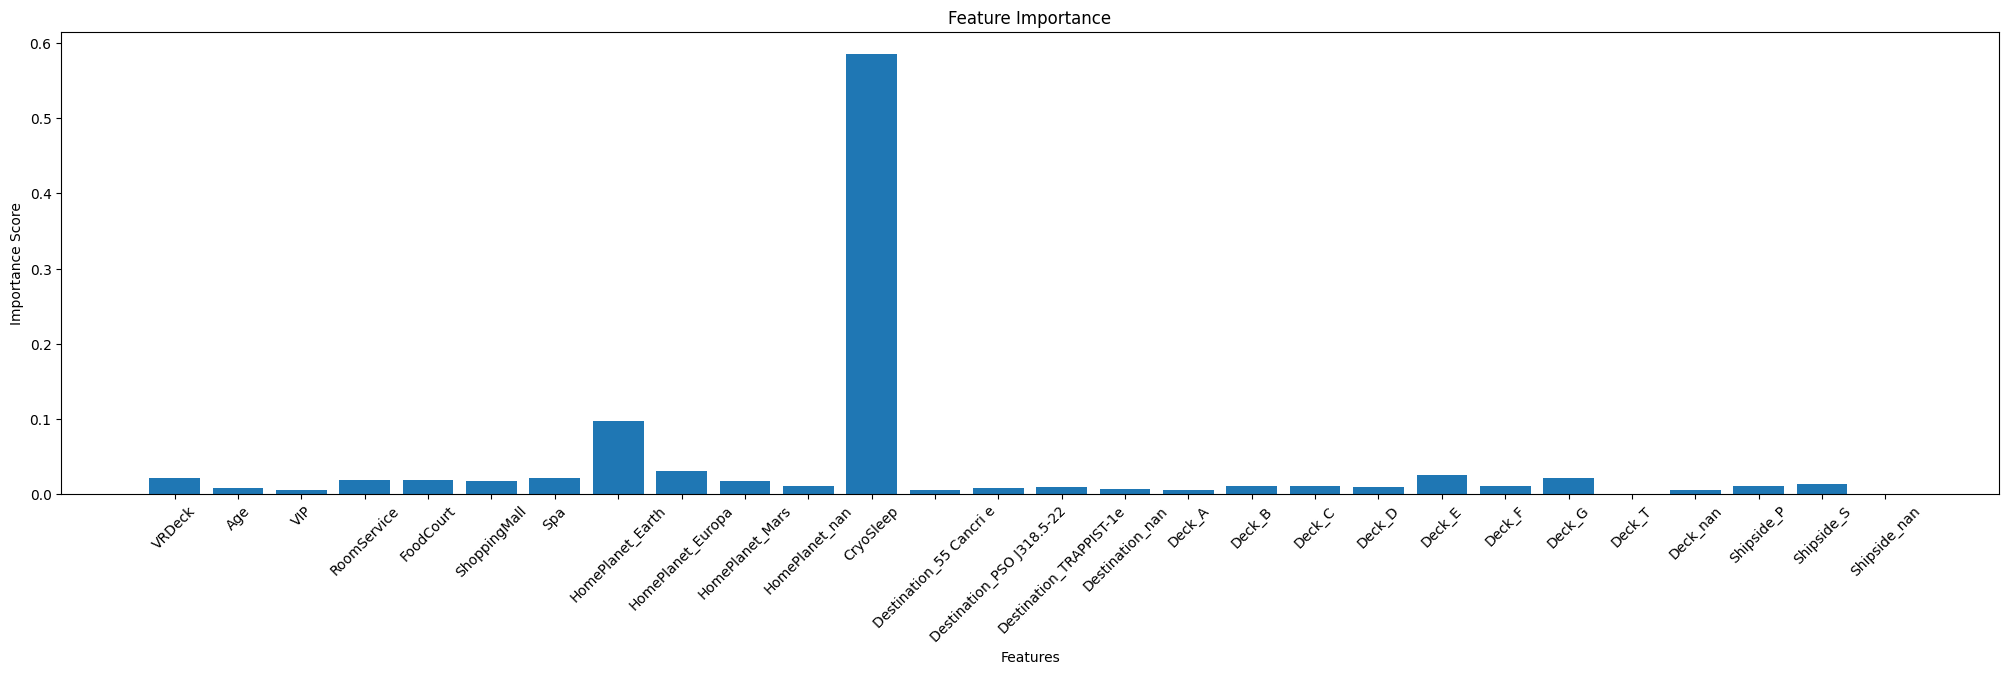

In [4]:
# XGBoost : 0.8022
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Extracting features X and target variable y
print(x_df.columns.tolist())

# Train XGBoost with all columns
X = x_df[['VRDeck', 'Age', 'VIP', 'RoomService', 'FoodCourt','ShoppingMall',
          'Spa','HomePlanet_Earth','HomePlanet_Europa','HomePlanet_Mars','HomePlanet_nan','CryoSleep',
          'Destination_55 Cancri e','Destination_PSO J318.5-22','Destination_TRAPPIST-1e', 'Destination_nan',
          'Deck_A','Deck_B','Deck_C','Deck_D','Deck_E','Deck_F','Deck_G','Deck_T', 'Deck_nan','Shipside_P','Shipside_S', 'Shipside_nan']]  # Include all relevant columns as features

# Train with only the best columns
# X = x_df[['HomePlanet_Earth','HomePlanet_Europa','HomePlanet_Mars','CryoSleep']]  # Include all relevant columns as features




# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_1, test_size=0.2, random_state=0)

# Create the XGBoost classifier
model = XGBClassifier(random_state=1, eta = 0.1, gamma = 0.5, max_depth = 7)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Get feature importance scores
feature_importance = model.feature_importances_

# Create a bar plot to visualize feature importance
plt.figure(figsize=(25, 6))
plt.bar(X.columns, feature_importance)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()


In [5]:
#preprocess 

In [6]:
import pandas as pd
import xgboost as xgb

# Assuming x_df_test is your prepared DataFrame and model is your trained XGBoost model

# Prepare the features from x_df_test
print(x_test_df.head())

# Define the order of columns based on the training data
feature_order = ['VRDeck', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 
                 'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'HomePlanet_nan', 
                 'CryoSleep', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 
                 'Destination_TRAPPIST-1e', 'Destination_nan', 'Deck_A', 'Deck_B', 'Deck_C', 
                 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T', 'Deck_nan', 'Shipside_P', 
                 'Shipside_S', 'Shipside_nan']

# Ensure x_df_test has the columns in the correct order
X_test = x_test_df[feature_order]

# Predict outcomes using the trained model
predictions = model.predict(X_test)

# Convert predictions to True/False
predicted_labels = predictions > 0.5

# Create a DataFrame with PassengerId and Transported columns
output_df = pd.DataFrame({
    'PassengerId': x_test_df['PassengerId'],
    'Transported': predicted_labels
})

# Convert boolean values to 'True'/'False' strings
output_df['Transported'] = output_df['Transported'].map({True: 'True', False: 'False'})

# Save the result to a CSV file
output_df.to_csv('predictions.csv', index=False)

   CryoSleep   Age  VIP  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  \
0        1.0  27.0  0.0          0.0        0.0           0.0     0.0     0.0   
1        0.0  19.0  0.0          0.0        9.0           0.0  2823.0     0.0   
2        1.0  31.0  0.0          0.0        0.0           0.0     0.0     0.0   
3        0.0  38.0  0.0          0.0     6652.0           0.0   181.0   585.0   
4        0.0  20.0  0.0         10.0        0.0         635.0     0.0     0.0   

   HomePlanet_Earth  HomePlanet_Europa  ...  Deck_D  Deck_E  Deck_F  Deck_G  \
0               1.0                0.0  ...     0.0     0.0     0.0     1.0   
1               1.0                0.0  ...     0.0     0.0     1.0     0.0   
2               0.0                1.0  ...     0.0     0.0     0.0     0.0   
3               0.0                1.0  ...     0.0     0.0     0.0     0.0   
4               1.0                0.0  ...     0.0     0.0     1.0     0.0   

   Deck_T  Deck_nan  Shipside_P  Ships